<a href="https://colab.research.google.com/github/SanazGerami/miniproject2/blob/main/Sanaz_Gerami_9929873_miniproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1)

Downloading...
From: https://drive.google.com/uc?id=1rQX8YUre3q2qXS3El3w2aNFGThCPiRgA
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 41.0MB/s]
The accuracy is: 0.9875


<ipython-input-50-592d3002cc73>:33: RuntimeWarning: invalid value encountered in log
  return np.mean(-(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat)))


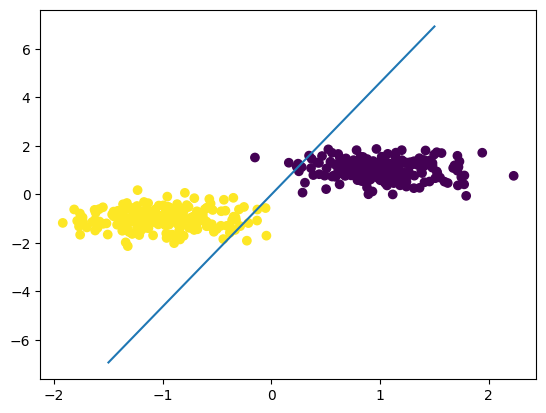

In [ ]:
#1.1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install gdown
!gdown 1rQX8YUre3q2qXS3El3w2aNFGThCPiRgA

df = pd.read_csv("Perceptron.csv")

from sklearn.model_selection import train_test_split
X = df.values[:, : -1]
y = df.values[:, -1]
y = y.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#activation_function

def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  return 1/(1 + np.exp(-x))

import math
def tanh(x):
  return np.tanh(x)

#loss_fn

def bce(y, y_hat):
  return np.mean(-(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat)))

def mse(y, y_hat):
  return np.mean((y - y_hat)**2)

#accuracy

def accuracy(y, y_hat, t = 0):
  y_hat = np.where(y_hat < t, -1, 1)
  acc = np.sum(y == y_hat) / len(y)
  return acc

class Neuron:

  def __init__(self, in_features, activation_function = None, loss_fn = None, n_itter = 100, eta = 0.1):
    self.in_features = in_features
    self.activation_function = activation_function
    self.loss_fn = loss_fn
    self.n_itter = n_itter
    self.eta = eta
    self.w = np.random.randn(in_features, 1)
    self.b = np.random.randn()
    self.loss_hist = []
    self.w_grad, self.b_grad = None, None

  def predict(self, x):
    y_hat = x @ self.w + self.b
    y_hat = y_hat if self.activation_function is None else self.activation_function(y_hat)
    return y_hat

  def fit(self, x, y):
    for i in range(self.n_itter):
      y_hat = self.predict(x)
      loss = self.loss_fn(y, y_hat)
      self.loss_hist.append(loss)
      self.gradient(x, y, y_hat)
      self.gradient_decent()

  def gradient(self, x, y, y_hat):
    self.w_grad = x.T @ (y_hat - y) / len(y)
    self.b_grad = (y_hat - y).mean()

  def gradient_decent(self):
    self.w -= self.eta * self.w_grad
    self.b -= self.eta * self.b_grad

  def parameters(self):
    return {'w': self.w, 'b': self.b}

neuron1 = Neuron(in_features = 2, activation_function = tanh, loss_fn = bce, n_itter = 10, eta = 0.1)
neuron1.fit(X_train, y_train)
y_hat = neuron1.predict(X_test)
acc = accuracy(y_test, y_hat)
print("The accuracy is: " + str(acc))


#1.2

x = np.linspace(-1.5, 1.5, 20)
plt.scatter(X[:, 0], X[:, 1], c = y)
y1 = (-(neuron1.b / neuron1.w[1]) / (neuron1.b / neuron1.w[0]))*x + (-neuron1.b / neuron1.w[1])
plt.plot(x, y1)




Q2)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

class McCulloch_Pitts():

  def __init__(self, weights, threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, x):
    if self.weights @ x >= self.threshold:
      return 1
    else:
      return 0

def multiplier(input):
  neur1 = McCulloch_Pitts([1, 1, 1, 1], 4)
  z1 = neur1.model(np.array([input[0], input[1], input[2], input[3]]))

  neru21 = McCulloch_Pitts([1, -1, 1], 2)
  z21 = neru21.model(np.array([input[0], input[1], input[2]]))
  neru22 = McCulloch_Pitts([1, 1, -1], 2)
  z22 = neru22.model(np.array([input[0], input[2], input[3]]))
  neru2 = McCulloch_Pitts([1, 1], 1)
  z2 = neru2.model(np.array([z21, z22]))

  neru31 = McCulloch_Pitts([1, -1, 1], 2)
  z31 = neru31.model(np.array([input[0], input[2], input[3]]))
  neru32 = McCulloch_Pitts([1, -1, 1], 2)
  z32 = neru32.model(np.array([input[0], input[1], input[3]]))
  neru33 = McCulloch_Pitts([1, 1, -1], 2)
  z33 = neru33.model(np.array([input[1], input[2], input[3]]))
  neru34 = McCulloch_Pitts([-1, 1, 1], 2)
  z34 = neru34.model(np.array([input[0], input[1], input[2]]))
  neru3 = McCulloch_Pitts([1, 1, 1, 1], 1)
  z3 = neru3.model(np.array([z31, z32, z33, z34]))

  neru4 = McCulloch_Pitts([1, 1], 2)
  z4 = neru4.model(np.array([input[1], input[3]]))

  y = [z1, z2, z3, z4]

  return y


a = [0, 1, 0, 1]
X = list(itertools.product(a, a, a, a))
input = []
for i in range(0, len(X)):
  n = input.count(X[i])
  if n == 0:
    input.append(X[i])

for i in range(0, len(input)):
  z = multiplier(input[i])
  print(str(input[i]) + ': result of the multiplication ' + str(z))



(0, 0, 0, 0): result of the multiplication [0, 0, 0, 0]
(0, 0, 0, 1): result of the multiplication [0, 0, 0, 0]
(0, 0, 1, 0): result of the multiplication [0, 0, 0, 0]
(0, 0, 1, 1): result of the multiplication [0, 0, 0, 0]
(0, 1, 0, 0): result of the multiplication [0, 0, 0, 0]
(0, 1, 0, 1): result of the multiplication [0, 0, 0, 1]
(0, 1, 1, 0): result of the multiplication [0, 0, 1, 0]
(0, 1, 1, 1): result of the multiplication [0, 0, 1, 1]
(1, 0, 0, 0): result of the multiplication [0, 0, 0, 0]
(1, 0, 0, 1): result of the multiplication [0, 0, 1, 0]
(1, 0, 1, 0): result of the multiplication [0, 1, 0, 0]
(1, 0, 1, 1): result of the multiplication [0, 1, 1, 0]
(1, 1, 0, 0): result of the multiplication [0, 0, 0, 0]
(1, 1, 0, 1): result of the multiplication [0, 0, 1, 1]
(1, 1, 1, 0): result of the multiplication [0, 1, 1, 0]
(1, 1, 1, 1): result of the multiplication [1, 0, 0, 1]


Q3)

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 21.5MB/s]
Archive:  PersianData.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   
Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg
noisy5.jpg


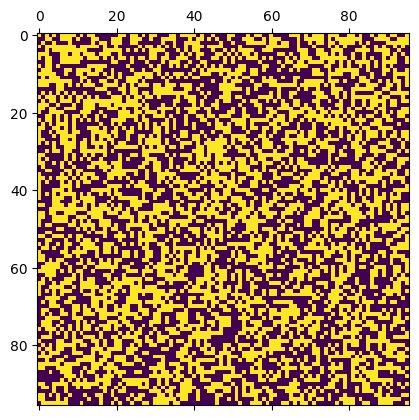

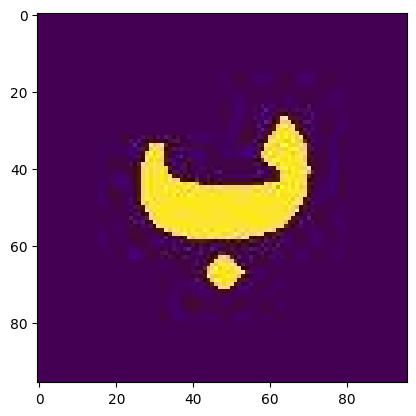

In [ ]:
#3.1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

from PIL import Image, ImageDraw
import matplotlib.image as img
import random
from imageio import imread

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 1000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


#3.2

import os
from math import sqrt

def change(vector, a, b):
  vector = np.array(vector)
  matrix = vector.reshape((a, b))
  return matrix

def product(matrix, vector, T):
  result_vector = []
  for i in range(len(matrix)):
    sum = 0
    for j in range(len(vector)):
      sum = sum + matrix[i][j] * vector[j]
    result_vector.append((sum + T))
  return result_vector

def action(vector, T, Emax):
  result_vector = []
  for value in vector:
    if value <= 0:
      result_vector.append(0)
    elif 0 < value <= T:
      result_vector.append(Emax*value)
    elif value > T:
      result_vector.append(T)
  return result_vector

def sum(vector, j):
  total_sum = 0
  for i in range(0, len(vector)):
    if i != j:
      total_sum = total_sum + vector[i]
  return total_sum

def norm(vector, p):
  difference = []
  for i in range(len(vector)):
    difference.append(vector[i] - p[i])
  sum = 0
  for element in difference:
    sum += element * element
  return sqrt(sum)

path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []
for i in path:
  x.append(convertImageToBinary(i))

image_path = "/content/noisy5.jpg"
y = convertImageToBinary(image_path)

print(os.path.basename(image_path))

k = len(x)
a = 96
b = 96
q = change(y, a, b)
plt.matshow(q)
m = len(x[0])
T = m / 2
Emax = 0.000001
U = 1 / Emax

w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]


for i in range(k):
  for j in range(k):
    if j == i:
      E[i][j] = 1.0
    else:
      E[i][j] = -e

s = [product(w, y, T)]
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

while norm(y[i], p) >= Emax:
  s.append([0 for j in range(len(s[0]))])
  for j in range(len(s[0])):
    s[i + 1][j] = y[i][j] - e*sum(y[i], j)
  y.append((action(s[i + 1], U, Emax)))
  i += 1
  p = y[i - 1]

result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1
q = change(x[result_index - 1], a, b)

from matplotlib import pyplot as plt
from matplotlib import image as img

img.imsave('output.jpg', q)
output_img = Image.open('output.jpg')
output_img = output_img.transpose(Image.FLIP_TOP_BOTTOM)
output_img = output_img.transpose(Image.ROTATE_270)
output_img.save('output.jpg')

plt.show()
image = img.imread('output.jpg')
print('\n' + '\n')
plt.imshow(image)
plt.show()





Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 23.8MB/s]
Archive:  PersianData.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   
Noisy image for /content/1.jpg generated and saved as /content/noisy_mp1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy_mp2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy_mp3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy_mp4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy_mp5.jpg
noisy_mp2.jpg





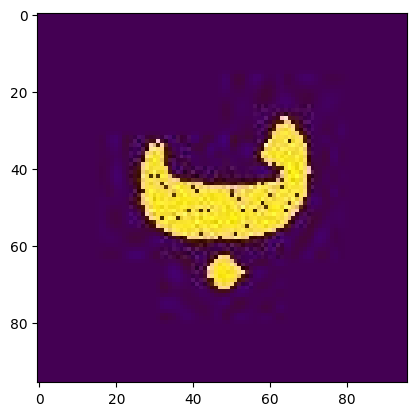

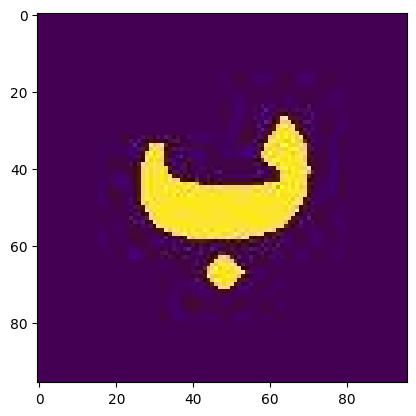

In [ ]:
#3.3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

from PIL import Image, ImageDraw
import matplotlib.image as img
import random
from imageio import imread

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy_mp{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path, num_missing_points = 500)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path, num_missing_points):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 1000

    for i in range(num_missing_points):
      x = random.randint(0, width - 1)
      y = random.randint(0, height - 1)
      draw.point((x, y), (255, 255, 255))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()

import os
from math import sqrt

def change(vector, a, b):
  vector = np.array(vector)
  matrix = vector.reshape((a, b))
  return matrix

def product(matrix, vector, T):
  result_vector = []
  for i in range(len(matrix)):
    sum = 0
    for j in range(len(vector)):
      sum = sum + matrix[i][j] * vector[j]
    result_vector.append((sum + T))
  return result_vector

def action(vector, T, Emax):
  result_vector = []
  for value in vector:
    if value <= 0:
      result_vector.append(0)
    elif 0 < value <= T:
      result_vector.append(Emax*value)
    elif value > T:
      result_vector.append(T)
  return result_vector

def sum(vector, j):
  total_sum = 0
  for i in range(0, len(vector)):
    if i != j:
      total_sum = total_sum + vector[i]
  return total_sum

def norm(vector, p):
  difference = []
  for i in range(len(vector)):
    difference.append(vector[i] - p[i])
  sum = 0
  for element in difference:
    sum += element * element
  return sqrt(sum)

path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []
for i in path:
  x.append(convertImageToBinary(i))

image_path = "/content/noisy_mp2.jpg"
y = convertImageToBinary(image_path)

print(os.path.basename(image_path))

k = len(x)
a = 96
b = 96
q = change(y, a, b)

img.imsave('output.jpg', q)
output_img = Image.open('output.jpg')
output_img = output_img.transpose(Image.FLIP_TOP_BOTTOM)
output_img = output_img.transpose(Image.ROTATE_270)
output_img.save('output.jpg')


image = img.imread('output.jpg')
print('\n' + '\n')
plt.imshow(image)


m = len(x[0])
T = m / 2
Emax = 0.000001
U = 1 / Emax

w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]


for i in range(k):
  for j in range(k):
    if j == i:
      E[i][j] = 1.0
    else:
      E[i][j] = -e

s = [product(w, y, T)]
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

while norm(y[i], p) >= Emax:
  s.append([0 for j in range(len(s[0]))])
  for j in range(len(s[0])):
    s[i + 1][j] = y[i][j] - e*sum(y[i], j)
  y.append((action(s[i + 1], U, Emax)))
  i += 1
  p = y[i - 1]

result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1
q = change(x[result_index - 1], a, b)

from matplotlib import pyplot as plt
from matplotlib import image as img

img.imsave('output.jpg', q)
output_img = Image.open('output.jpg')
output_img = output_img.transpose(Image.FLIP_TOP_BOTTOM)
output_img = output_img.transpose(Image.ROTATE_270)
output_img.save('output.jpg')

plt.show()
image = img.imread('output.jpg')
print('\n' + '\n')
plt.imshow(image)
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 25.1MB/s]
Archive:  PersianData.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   
Noisy image for /content/1.jpg generated and saved as /content/noisy_n_mp1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy_n_mp2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy_n_mp3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy_n_mp4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy_n_mp5.jpg
noisy_n_mp5.jpg


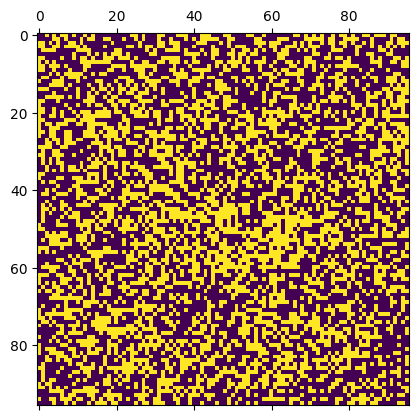

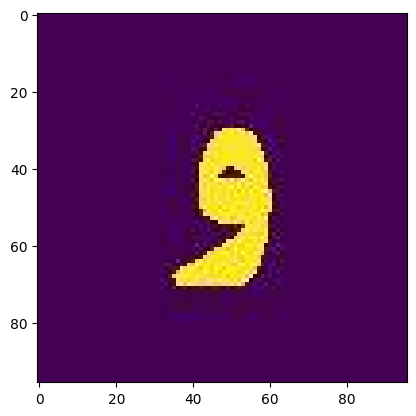

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

from PIL import Image, ImageDraw
import matplotlib.image as img
import random
from imageio import imread

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy_n_mp{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path, num_missing_points = 500)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path, num_missing_points):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 1000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    #Adding Missing Points
    for i in range(num_missing_points):
      x = random.randint(0, width - 1)
      y = random.randint(0, height - 1)
      draw.point((x, y), (255, 255, 255))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()

import os
from math import sqrt

def change(vector, a, b):
  vector = np.array(vector)
  matrix = vector.reshape((a, b))
  return matrix

def product(matrix, vector, T):
  result_vector = []
  for i in range(len(matrix)):
    sum = 0
    for j in range(len(vector)):
      sum = sum + matrix[i][j] * vector[j]
    result_vector.append((sum + T))
  return result_vector

def action(vector, T, Emax):
  result_vector = []
  for value in vector:
    if value <= 0:
      result_vector.append(0)
    elif 0 < value <= T:
      result_vector.append(Emax*value)
    elif value > T:
      result_vector.append(T)
  return result_vector

def sum(vector, j):
  total_sum = 0
  for i in range(0, len(vector)):
    if i != j:
      total_sum = total_sum + vector[i]
  return total_sum

def norm(vector, p):
  difference = []
  for i in range(len(vector)):
    difference.append(vector[i] - p[i])
  sum = 0
  for element in difference:
    sum += element * element
  return sqrt(sum)

path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []
for i in path:
  x.append(convertImageToBinary(i))

image_path = "/content/noisy_n_mp5.jpg"
y = convertImageToBinary(image_path)

print(os.path.basename(image_path))

k = len(x)
a = 96
b = 96
q = change(y, a, b)
plt.matshow(q)
m = len(x[0])
T = m / 2
Emax = 0.000001
U = 1 / Emax

w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]


for i in range(k):
  for j in range(k):
    if j == i:
      E[i][j] = 1.0
    else:
      E[i][j] = -e

s = [product(w, y, T)]
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

while norm(y[i], p) >= Emax:
  s.append([0 for j in range(len(s[0]))])
  for j in range(len(s[0])):
    s[i + 1][j] = y[i][j] - e*sum(y[i], j)
  y.append((action(s[i + 1], U, Emax)))
  i += 1
  p = y[i - 1]

result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1
q = change(x[result_index - 1], a, b)

from matplotlib import pyplot as plt
from matplotlib import image as img

img.imsave('output.jpg', q)
output_img = Image.open('output.jpg')
output_img = output_img.transpose(Image.FLIP_TOP_BOTTOM)
output_img = output_img.transpose(Image.ROTATE_270)
output_img.save('output.jpg')

plt.show()
image = img.imread('output.jpg')
print('\n' + '\n')
plt.imshow(image)
plt.show()

Q4)

Downloading...
From: https://drive.google.com/uc?id=1VkyRxeJu04QKglgjUruI634cUy1-I1Lc
To: /content/data.csv
100% 527k/527k [00:00<00:00, 23.2MB/s]
<bound method DataFrame.info of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0  

<ipython-input-66-b7e4884ddf8c>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


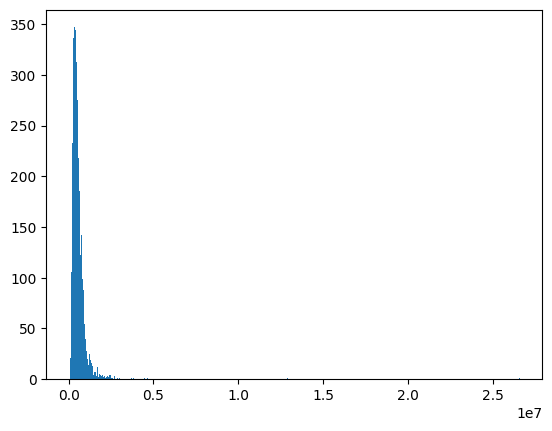

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

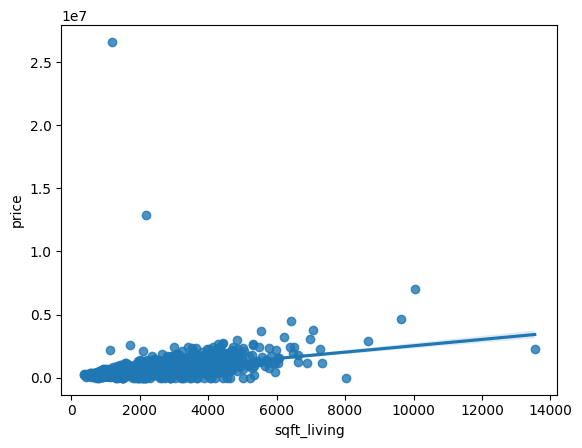

In [ ]:
#4.1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install gdown
!gdown 1VkyRxeJu04QKglgjUruI634cUy1-I1Lc

df = pd.read_csv("data.csv")
print(df.info)
print("The number of Nan data under the 'date' column: " + str(df['date'].isnull().sum()))
print("The number of Nan data under the 'price' column: " + str(df['price'].isnull().sum()))
print("The number of Nan data under the 'bedroos' column: " + str(df['bedrooms'].isnull().sum()))
print("The number of Nan data under the 'bathrooms' column: " + str(df['bathrooms'].isnull().sum()))
print("The number of Nan data under the 'sqft_living' column: " + str(df['sqft_living'].isnull().sum()))
print("The number of Nan data under the 'floors' column: " + str(df['floors'].isnull().sum()))
print("The number of Nan data under the 'waterfront' column: " + str(df['waterfront'].isnull().sum()))
print("The number of Nan data under the 'view' column: " + str(df['view'].isnull().sum()))
print("The number of Nan data under the 'condition' column: " + str(df['condition'].isnull().sum()))
print("The number of Nan data under the 'sqft_above' column: " + str(df['sqft_above'].isnull().sum()))
print("The number of Nan data under the 'sqft_basement' column: " + str(df['sqft_basement'].isnull().sum()))
print("The number of Nan data under the 'yr_built' column: " + str(df['yr_built'].isnull().sum()))
print("The number of Nan data under the 'yr_renovated' column: " + str(df['yr_renovated'].isnull().sum()))
print("The number of Nan data under the 'street' column: " + str(df['street'].isnull().sum()))
print("The number of Nan data under the 'city' column: " + str(df['city'].isnull().sum()))
print("The number of Nan data under the 'statezip' column: " + str(df['statezip'].isnull().sum()))
print("The number of Nan data under the 'country' column: " + str(df['country'].isnull().sum()))


#4.2

corr_matrix = df.corr()
print("\n")
print(corr_matrix)


#4.3

plt.hist(df['price'], bins = 'auto')
plt.show()

import seaborn as sns
sns.regplot(x = df['sqft_living'], y = df['price'])


#4.4

df[['year', 'month', 'day']] = df['date'].str.split('-', expand = True)
df = df.drop('date', axis = 1)
df = df.drop('day', axis = 1)
print(df)

In [ ]:
#4.5

import numpy as np

from sklearn.model_selection import train_test_split
X = df.values[:, 1 : 13]
y = df.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



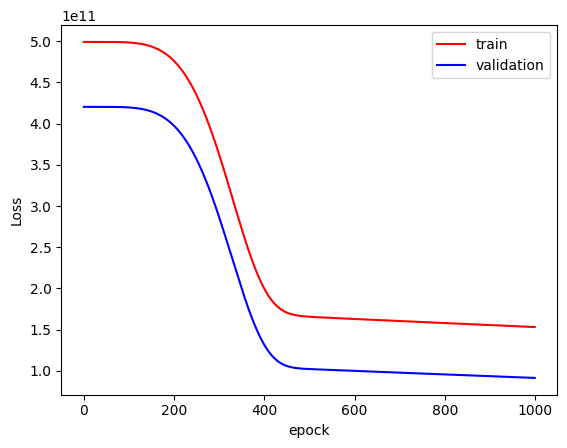

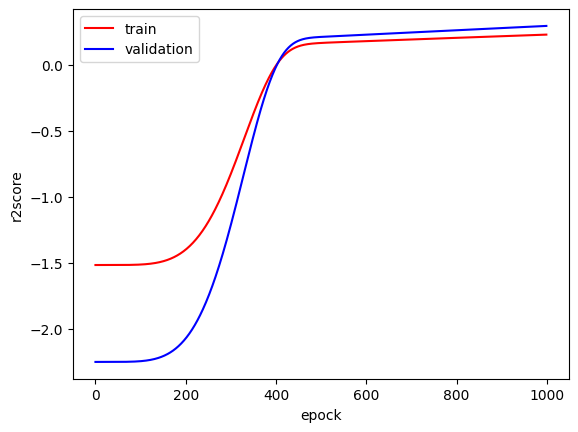

Loss: tensor(8.3206e+11)R2 Score: 0.02198784914079499





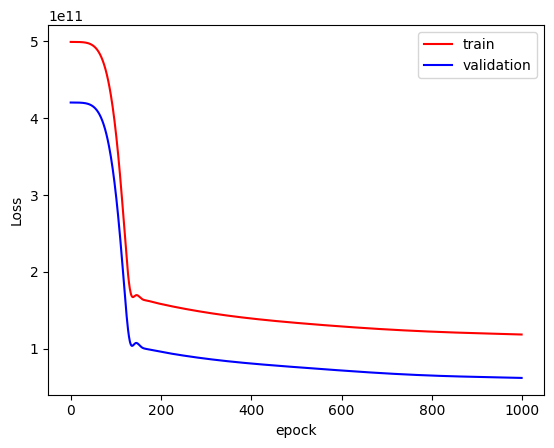

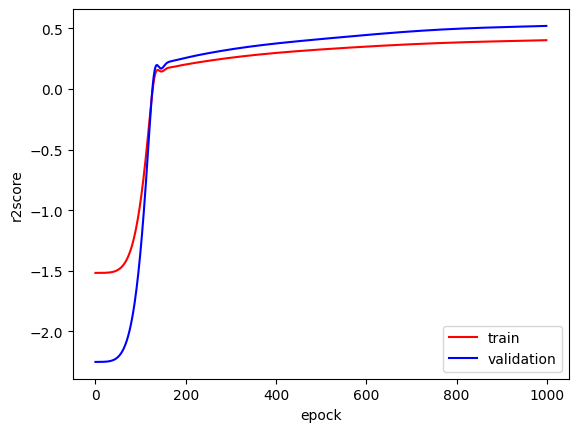

Loss: tensor(8.2266e+11)R2 Score: 0.03303937283763003





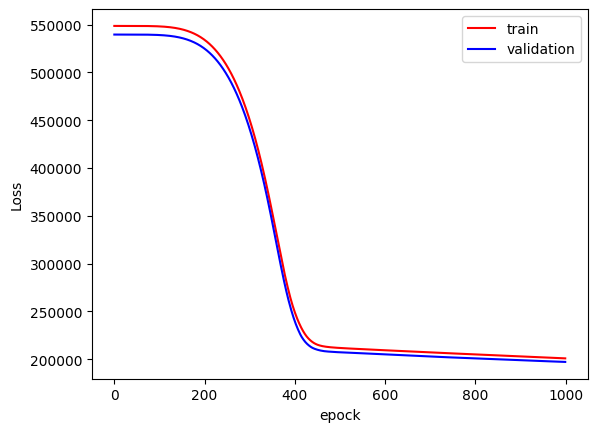

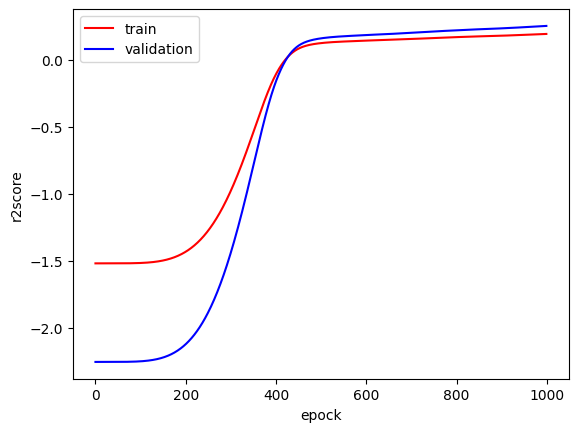

Loss: tensor(220833.4219)R2 Score: 0.014743191227321817


In [ ]:
#4.6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

class MLP(nn.Module):
  def __init__(self, num_input, num_hidden1, num_hidden2, num_hidden3, num_output):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(num_input, num_hidden1)
    self.fc2 = nn.Linear(num_hidden1, num_hidden2)
    self.fc3 = nn.Linear(num_hidden2, num_hidden3)
    self.fc4 = nn.Linear(num_hidden3, num_output)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x

from sklearn.model_selection import train_test_split
X = df.values[:, 1 : 13]
y = df.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

def train(model, optimizer, criterion, X_train, y_train, X_val, y_val, num_epock = 1000):
  train_loss_list = []
  validation_loss_list = []
  train_r2score_list = []
  r2score_list = []

  for i in range(num_epock):
    model.train()
    optimizer.zero_grad()
    yhat_train = model(X_train)
    train_loss = criterion(yhat_train.squeeze(), y_train)
    train_loss.backward()
    optimizer.step()
    train_loss_list.append(train_loss.item())
    train_r2score = r2_score(y_train, yhat_train.squeeze().detach().numpy())
    train_r2score_list.append(train_r2score)

    model.eval()
    with torch.no_grad():
      yhat_val = model(X_val)
      val_loss = criterion(yhat_val.squeeze(), y_val)
      validation_loss_list.append(val_loss.item())
      r2score = r2_score(y_val, yhat_val.squeeze().detach().numpy())
      r2score_list.append(r2score)

  plt.plot(train_loss_list, color = 'red', label = 'train')
  plt.plot(validation_loss_list, color = 'blue', label = 'validation')
  plt.xlabel('epock')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  plt.plot(train_r2score_list, color = 'red', label = 'train')
  plt.plot(r2score_list, color = 'blue', label = 'validation')
  plt.xlabel('epock')
  plt.ylabel('r2score')
  plt.legend()
  plt.show()

X_train = torch.Tensor(X_train)
y_train = y_train.astype(float)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = y_val.astype(float)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = y_test.astype(float)
y_test = torch.Tensor(y_test)

mlp = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adam(mlp.parameters(), lr = 0.001)
criterian = nn.MSELoss()
mlp_ = train(mlp, optimizer, criterian, X_train, y_train, X_val, y_val, num_epock = 1000)

mlp.eval()
with torch.no_grad():
  yhat = mlp(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))


#4.7

print('\n' + '\n')

mlp2 = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adamax(mlp2.parameters(), lr = 0.01)
criterian = nn.MSELoss()
mlp_ = train(mlp2, optimizer, criterian, X_train, y_train, X_val, y_val, num_epock = 1000)

mlp2.eval()
with torch.no_grad():
  yhat = mlp2(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))

print('\n' + '\n')

mlp3 = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adam(mlp3.parameters(), lr = 0.001)
criterian = nn.HuberLoss()
mlp_ = train(mlp3, optimizer, criterian, X_train, y_train, X_val, y_val, num_epock = 1000)

mlp3.eval()
with torch.no_grad():
  yhat = mlp3(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))


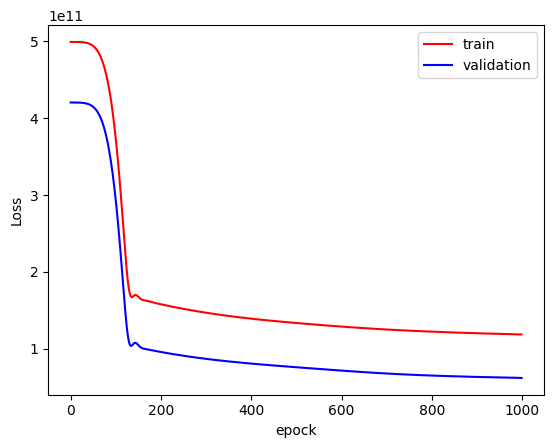

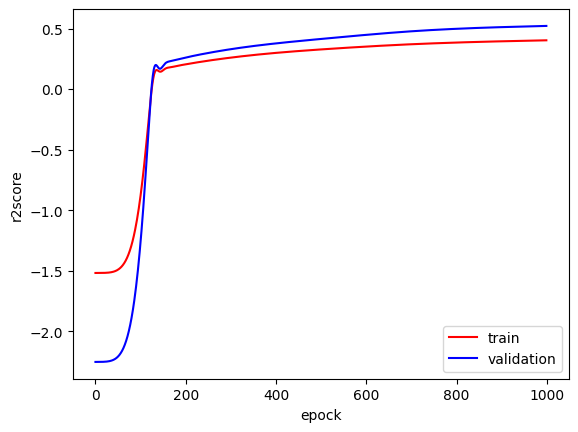

Loss: tensor(8.2214e+11)R2 Score: 0.03364863399894091
y_test: tensor(420000.)
predicted y: tensor([474791.7188])


y_test: tensor(530000.)
predicted y: tensor([475574.1562])


y_test: tensor(773000.)
predicted y: tensor([550632.7500])


y_test: tensor(350000.)
predicted y: tensor([516726.1250])


y_test: tensor(627000.)
predicted y: tensor([672611.1250])




In [ ]:
#4.8

import tensorflow as tf

mlp = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adamax(mlp.parameters(), lr = 0.01)
criterian = nn.MSELoss()
mlp_ = train(mlp, optimizer, criterian, X_train, y_train, X_val, y_val, num_epock = 1000)

mlp.eval()
with torch.no_grad():
  yhat = mlp(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))

y_test.reshape([1, 920])
yhat.reshape([1, 920])

for i in range(0, 5):
  n = np.random.randint(0, int(len(y)* 0.2))
  print("y_test: " + str(y_test[n]))
  print("predicted y: " + str(yhat[n]))
  print('\n')





Q5)

In [ ]:
#5.1

import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

df = datasets.load_iris()
X = df['data']
y = df['target']
y = y.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


#5.2

#Evaluation Indicators

def accuracy(yhat, y):
  n = 0
  for i in range(0, len(y)):
    if (y[i] == yhat[i]):
      n = n + 1
  a = n/len(y)
  return a

def precision(yhat, y):
  TP_0 = 0
  FP_0 = 0
  TP_1 = 0
  FP_1 = 0
  TP_2 = 0
  FP_2 = 0
  for i in range(len(y)):
    if (y[i] == 0):
      if (yhat[i] == 0):
        TP_0 = TP_0 + 1
    if (yhat[i] == 0):
      if (y[i] != 0):
        FP_0 = FP_0 + 1
    if (y[i] == 1):
      if (yhat[i] == 1):
        TP_1 = TP_1 + 1
    if (yhat[i] == 1):
       if (y[i] != 1):
        FP_1 = FP_1 + 1
    if (y[i] == 2):
      if (yhat[i] == 2):
        TP_2 = TP_2 + 1
    if (yhat[i] == 2):
      if (y[i] != 2):
        FP_2 = FP_2 + 1
  a_0 = TP_0 / (TP_0 + FP_0)
  a_1 = TP_1 / (TP_1 + FP_1)
  a_2 = TP_2 / (TP_2 + FP_2)
  a = (a_0 + a_1 + a_2) / 3
  return a

def recall(yhat, y):
  TP_0 = 0
  FN_0 = 0
  TP_1 = 0
  FN_1 = 0
  TP_2 = 0
  FN_2 = 0
  for i in range(len(y)):
    if (y[i] == 0):
      if (yhat[i] == 0):
        TP_0 = TP_0 + 1
      else:
        FN_0 = FN_0 + 1
    if (y[i] == 1):
      if (yhat[i] == 1):
        TP_1 = TP_1 + 1
      else:
        FN_1 = FN_1 + 1
    if (y[i] == 2):
      if (yhat[i] == 2):
        TP_2 = TP_2 + 1
      else:
        FN_2 = FN_2 + 1
  a_0 = TP_0 / (TP_0 + FN_0)
  a_1 = TP_1 / (TP_1 + FN_1)
  a_2 = TP_2 / (TP_2 + FN_2)
  a = (a_0 + a_1 + a_2) / 3
  return a

def F1score(p, r):
  a = (2*p*r) / (p + r)
  return a

from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion_m(y, yhat):
  cm = confusion_matrix(y, yhat)
  sns.heatmap(cm, annot = True, xticklabels = ['Setosa', 'Versicolour', 'Virginica'], yticklabels = ['Setosa', 'Versicolour', 'Virginica'])
  plt.ylabel('Prediction')
  plt.xlabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()




LogisticRegression (sklearn)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


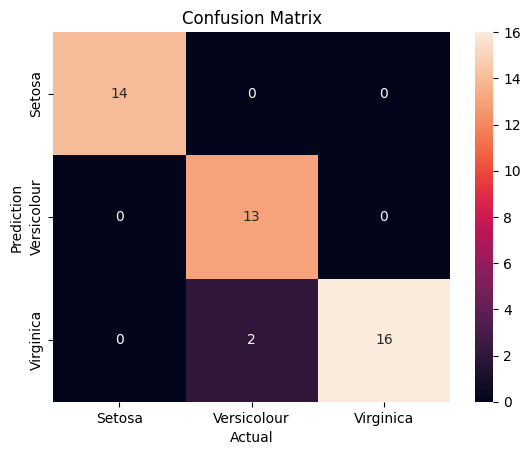




The 'accuracy' of 'LogisticRegression': 0.9555555555555556
The 'precision' of 'LogisticRegression': 0.9555555555555556
The 'recall' of 'LogisticRegression': 0.9629629629629629
The 'F1score' of 'LogisticRegression': 0.9592449592449592


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 73)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
a = accuracy(yhat, y_test)
p = precision(yhat, y_test)
r = recall(yhat, y_test)
F = F1score(p, r)
cm = confusion_m(y_test, yhat)
print('\n' + '\n')
print("The 'accuracy' of 'LogisticRegression': " + str(a))
print("The 'precision' of 'LogisticRegression': " + str(p))
print("The 'recall' of 'LogisticRegression': " + str(r))
print("The 'F1score' of 'LogisticRegression': " + str(F))



LogisticRegression (Scratch)

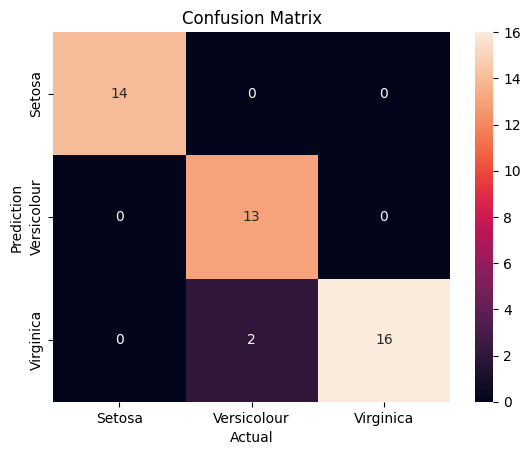




The 'accuracy' of 'LogisticRegression': 0.9555555555555556
The 'precision' of 'LogisticRegression': 0.9555555555555556
The 'recall' of 'LogisticRegression': 0.9629629629629629
The 'F1score' of 'LogisticRegression': 0.9592449592449592


In [ ]:
def predict(x, w):
  y_ = x @ w
  y_hat = 1 / (1 + np.exp(-(y_)))
  return y_hat

def gradient(x, y, y_hat):
  g = (x.T @ (y_hat - y)) / len(y)
  return g

def gradient_descent(w, eta, g):
  w -= eta*g
  return w

w = np.random.randn(4, 1)

eta = 0.001
epock = 500

for i in range(0, epock):
  y_hat = predict(X_train, w)
  g = gradient(X_train, y_train, y_hat)
  w = gradient_descent(w, eta, g)

y_hat = predict(X_test, w)
cm = confusion_m(y_test, yhat)
print('\n' + '\n')
print("The 'accuracy' of 'LogisticRegression': " + str(a1))
print("The 'precision' of 'LogisticRegression': " + str(p))
print("The 'recall' of 'LogisticRegression': " + str(r))
print("The 'F1score' of 'LogisticRegression': " + str(F))

MLP (sklearn)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


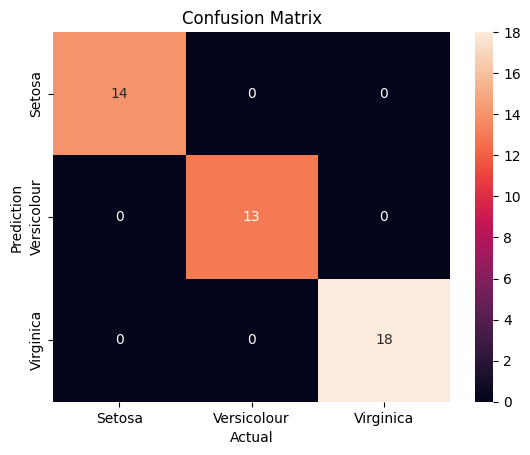




The 'accuracy' of 'MLP': 1.0
The 'precision' of 'MLP': 1.0
The 'recall' of 'MLP': 1.0
The 'F1score' of 'MLP': 1.0


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (50, 20, 5), max_iter = 500, random_state = 73)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
a = accuracy(yhat, y_test)
p = precision(yhat, y_test)
r = recall(yhat, y_test)
F = F1score(p, r)
cm = confusion_m(y_test, yhat)
print('\n' + '\n')
print("The 'accuracy' of 'MLP': " + str(a))
print("The 'precision' of 'MLP': " + str(p))
print("The 'recall' of 'MLP': " + str(r))
print("The 'F1score' of 'MLP': " + str(F))


RBF (sklearn)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


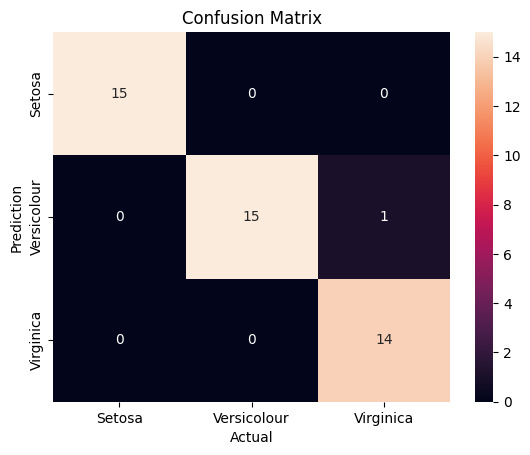




The 'accuracy' of 'MLP': 0.9777777777777777
The 'precision' of 'MLP': 0.9777777777777779
The 'recall' of 'MLP': 0.9791666666666666
The 'F1score' of 'MLP': 0.9784717293588835


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
a = accuracy(yhat, y_test)
p = precision(yhat, y_test)
r = recall(yhat, y_test)
F = F1score(p, r)
cm = confusion_m(y_test, yhat)
print('\n' + '\n')
print("The 'accuracy' of 'MLP': " + str(a))
print("The 'precision' of 'MLP': " + str(p))
print("The 'recall' of 'MLP': " + str(r))
print("The 'F1score' of 'MLP': " + str(F))
